<a href="https://colab.research.google.com/github/SamuelBFG/ga-fading/blob/main/GA_Shadowed_Kappa_Mu_Type_1_Fading_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !unzip mmwave-data.zip

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import special as sp
from scipy.stats import gaussian_kde
from scipy.io import loadmat
from sklearn.neighbors import KernelDensity
from scipy import special as sp
import warnings
warnings.filterwarnings('ignore')

# Data Load

## Small Scale Fading Data 

In [3]:
def SSF_mmdata_pathAB_dB():   
  ap_1 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_2 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_3 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_4 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_5 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_6 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_7 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_8 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_9 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def SSF_mmdata_pathAB_linear():   
  ap_1 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_2 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_3 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_4 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_5 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_6 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_7 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_8 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_9 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def SSF_mmdata_pathBA_dB():   
  ap_1 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_2 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_3 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_4 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_5 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_6 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_7 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_8 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_9 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def SSF_mmdata_pathBA_linear():   
  ap_1 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_2 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_3 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_4 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_5 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_6 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_7 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_8 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_9 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

######################
#### LOAD PATH AB ####
######################
SSF_pathAB_dB = pd.DataFrame()
SSF_pathAB_dB['AP1'], SSF_pathAB_dB['AP2'], SSF_pathAB_dB['AP3'],\
 SSF_pathAB_dB['AP4'], SSF_pathAB_dB['AP5'], SSF_pathAB_dB['AP6'],\
  SSF_pathAB_dB['AP7'], SSF_pathAB_dB['AP8'], SSF_pathAB_dB['AP9'] = SSF_mmdata_pathAB_dB()

SSF_pathAB_linear = pd.DataFrame()
SSF_pathAB_linear['AP1'], SSF_pathAB_linear['AP2'], SSF_pathAB_linear['AP3'],\
 SSF_pathAB_linear['AP4'], SSF_pathAB_linear['AP5'], SSF_pathAB_linear['AP6'],\
  SSF_pathAB_linear['AP7'], SSF_pathAB_linear['AP8'], SSF_pathAB_linear['AP9'] = SSF_mmdata_pathAB_linear()


######################
#### LOAD PATH BA ####
######################
SSF_pathBA_dB = pd.DataFrame()
SSF_pathBA_dB['AP1'], SSF_pathBA_dB['AP2'], SSF_pathBA_dB['AP3'],\
 SSF_pathBA_dB['AP4'], SSF_pathBA_dB['AP5'], SSF_pathBA_dB['AP6'],\
  SSF_pathBA_dB['AP7'], SSF_pathBA_dB['AP8'], SSF_pathBA_dB['AP9'] = SSF_mmdata_pathBA_dB()

SSF_pathBA_linear = pd.DataFrame()
SSF_pathBA_linear['AP1'], SSF_pathBA_linear['AP2'], SSF_pathBA_linear['AP3'],\
 SSF_pathBA_linear['AP4'], SSF_pathBA_linear['AP5'], SSF_pathBA_linear['AP6'],\
  SSF_pathBA_linear['AP7'], SSF_pathBA_linear['AP8'], SSF_pathBA_linear['AP9'] = SSF_mmdata_pathBA_linear()

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(SSF_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(SSF_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(SSF_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(SSF_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-0.696300,-0.706977,-0.950157,-0.649444,-0.671172,-1.023778,-0.975409,-0.890574,-1.067207
std,3.827021,3.843941,4.345763,3.608783,3.657521,4.609185,4.428430,4.217900,4.628232
min,-28.257000,-26.160000,-30.613000,-26.990000,-29.916000,-29.998000,-27.744000,-24.949000,-26.882000
25%,-2.003200,-2.086100,-2.829525,-1.817875,-1.925500,-3.061450,-3.032250,-2.724975,-3.256600
50%,0.017756,-0.086271,-0.148310,-0.047697,-0.012861,-0.149310,-0.141100,-0.180765,-0.253520
75%,1.553000,1.488500,1.844975,1.316550,1.431450,1.974400,1.982550,1.821300,2.012050
max,8.209900,9.598300,9.200100,10.698000,9.334600,8.803300,9.140200,9.140100,9.516400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,0.998078,0.999170,0.994459,0.996652,0.996119,0.998034,0.996456,0.996790,0.996149
std,0.346952,0.361394,0.406651,0.340052,0.342458,0.428794,0.417400,0.402380,0.439500
min,0.038648,0.049204,0.029467,0.044717,0.031928,0.031630,0.041001,0.056568,0.045280
25%,0.794040,0.786490,0.721980,0.811160,0.801170,0.702955,0.705320,0.730723,0.687333
50%,1.002000,0.990120,0.983070,0.994525,0.998520,0.982960,0.983890,0.979400,0.971230
75%,1.195800,1.186900,1.236625,1.163675,1.179200,1.255200,1.256400,1.233275,1.260675
max,2.573300,3.019400,2.884100,3.426900,2.929100,2.755300,2.864200,2.864200,2.991000


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.141164,-1.154185,-1.201912,-1.197784,-1.120310,-1.244764,-1.132814,-1.108337,-1.219527
std,4.811502,4.821488,4.949272,4.950949,4.758712,5.050291,4.790806,4.782434,5.034982
min,-27.320000,-27.572000,-29.529000,-28.736000,-30.499000,-31.529000,-26.868000,-28.713000,-29.627000
25%,-3.625500,-3.761550,-3.749250,-3.664900,-3.414300,-3.908400,-3.468750,-3.467175,-3.835200
50%,-0.280440,-0.366350,-0.327530,-0.265050,-0.282530,-0.364120,-0.316615,-0.214105,-0.305010
75%,2.210025,2.240700,2.276500,2.249450,2.210200,2.357300,2.133950,2.137500,2.370900
max,10.524000,10.389000,10.315000,9.950700,9.385600,9.530000,10.148000,9.653300,10.109000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,0.997566,0.998390,0.998292,0.996041,0.994971,0.997650,0.996580,0.998705,0.999811
std,0.457868,0.468088,0.473801,0.460772,0.442697,0.477986,0.454135,0.453083,0.476423
min,0.043050,0.041821,0.033383,0.036578,0.029857,0.026520,0.045353,0.036673,0.033011
25%,0.658760,0.648515,0.649440,0.655775,0.674970,0.637650,0.670752,0.670878,0.643050
50%,0.968230,0.958700,0.962990,0.969950,0.968000,0.958950,0.964205,0.975650,0.965490
75%,1.289700,1.294300,1.299650,1.295600,1.289800,1.311800,1.278500,1.279025,1.313800
max,3.358700,3.307100,3.279200,3.144400,2.946300,2.995700,3.216800,3.038600,3.202300


## Composite (Small + Large) Scale Fading Data

In [4]:
def composite_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('/content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('/content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('/content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('/content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('/content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('/content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('/content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('/content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('/content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('/content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('/content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('/content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('/content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('/content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('/content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('/content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('/content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('/content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def composite_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('/content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('/content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('/content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('/content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('/content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('/content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('/content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('/content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('/content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('/content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('/content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('/content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('/content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('/content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('/content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('/content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('/content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('/content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

######################
#### LOAD PATH AB ####
######################
composite_pathAB_dB = pd.DataFrame()
composite_pathAB_dB['AP1'], composite_pathAB_dB['AP2'], composite_pathAB_dB['AP3'],\
 composite_pathAB_dB['AP4'], composite_pathAB_dB['AP5'], composite_pathAB_dB['AP6'],\
  composite_pathAB_dB['AP7'], composite_pathAB_dB['AP8'], composite_pathAB_dB['AP9'] = composite_mmdata_dB('AB')

composite_pathAB_linear = pd.DataFrame()
composite_pathAB_linear['AP1'], composite_pathAB_linear['AP2'], composite_pathAB_linear['AP3'],\
 composite_pathAB_linear['AP4'], composite_pathAB_linear['AP5'], composite_pathAB_linear['AP6'],\
  composite_pathAB_linear['AP7'], composite_pathAB_linear['AP8'], composite_pathAB_linear['AP9'] = composite_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
composite_pathBA_dB = pd.DataFrame()
composite_pathBA_dB['AP1'], composite_pathBA_dB['AP2'], composite_pathBA_dB['AP3'],\
 composite_pathBA_dB['AP4'], composite_pathBA_dB['AP5'], composite_pathBA_dB['AP6'],\
  composite_pathBA_dB['AP7'], composite_pathBA_dB['AP8'], composite_pathBA_dB['AP9'] = composite_mmdata_dB('BA')

composite_pathBA_linear = pd.DataFrame()
composite_pathBA_linear['AP1'], composite_pathBA_linear['AP2'], composite_pathBA_linear['AP3'],\
 composite_pathBA_linear['AP4'], composite_pathBA_linear['AP5'], composite_pathBA_linear['AP6'],\
  composite_pathBA_linear['AP7'], composite_pathBA_linear['AP8'], composite_pathBA_linear['AP9'] = composite_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(composite_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(composite_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(composite_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(composite_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-1.331243,-2.026816,-2.148211,-1.354591,-1.358023,-1.965932,-1.867219,-2.455355,-2.377686
std,5.555703,5.295770,5.622319,5.555328,5.270987,6.592554,5.370040,4.979277,5.386154
min,-34.977000,-35.591000,-37.205000,-33.143000,-34.196000,-36.296000,-32.348000,-32.857000,-32.103000
25%,-4.141100,-4.725900,-5.285100,-4.408050,-4.099150,-5.727400,-4.738550,-4.891600,-5.360025
50%,-0.597460,-1.021800,-1.318900,-0.049510,-0.654870,-1.528100,-0.982990,-1.590450,-1.507750
75%,2.620200,1.610700,1.786325,2.748350,1.862300,2.231150,1.945700,0.924527,1.539700
max,12.562000,9.626500,10.084000,9.553500,11.060000,13.356000,11.339000,9.054900,8.569400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,1.016877,0.921460,0.932225,1.008525,1.005849,1.035511,0.946677,0.863832,0.893894
std,0.547200,0.453448,0.513528,0.503199,0.564291,0.775473,0.486083,0.408087,0.462476
min,0.017830,0.016613,0.013796,0.022022,0.019507,0.015317,0.024133,0.022760,0.024821
25%,0.620790,0.580370,0.544185,0.602000,0.623795,0.517165,0.579525,0.569400,0.539513
50%,0.933530,0.889020,0.859125,0.994320,0.927380,0.838670,0.893000,0.832675,0.840645
75%,1.352150,1.203700,1.228300,1.372175,1.239150,1.292900,1.251050,1.112300,1.193975
max,4.247100,3.029200,3.193200,3.003800,3.572700,4.653600,3.689400,2.836300,2.682100


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.478477,-1.796911,-1.697986,-1.304056,-1.382989,-1.228730,-1.269627,-1.546466,-1.263962
std,5.612589,5.461735,5.331014,5.664596,5.709885,5.531827,5.590528,6.177197,5.595894
min,-29.275000,-30.195000,-29.306000,-31.022000,-35.014000,-30.264000,-29.162000,-32.034000,-29.974000
25%,-4.688175,-4.909150,-4.600750,-4.491600,-4.574200,-4.335100,-4.386750,-5.096475,-4.449900
50%,-0.726485,-1.062800,-0.846180,-0.413770,-0.738970,-0.424370,-0.462455,-0.927085,-0.411740
75%,2.475750,2.116600,2.084900,2.743400,2.576700,2.746100,2.654150,2.612550,2.782800
max,13.313000,12.184000,11.274000,13.101000,11.902000,10.764000,12.810000,14.148000,13.559000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,1.010464,0.963914,0.964883,1.029932,1.026995,1.030575,1.030587,1.047470,1.031002
std,0.577506,0.527819,0.503657,0.570421,0.595472,0.556338,0.572540,0.705591,0.566503
min,0.034377,0.030919,0.034252,0.028112,0.017754,0.030675,0.034824,0.025021,0.031717
25%,0.582895,0.568255,0.588795,0.596235,0.590590,0.607080,0.603480,0.556130,0.599110
50%,0.919760,0.884830,0.907180,0.953480,0.918440,0.952320,0.948150,0.898760,0.953700
75%,1.329775,1.275950,1.271300,1.371450,1.345300,1.371800,1.357425,1.350900,1.377700
max,4.630500,4.066500,3.661900,4.518900,3.936400,3.453000,4.370200,5.098000,4.763800


# Auxiliary Methods

In [5]:
def KappaMuPDF(r, kappa, mu, omega):
  '''
  kappa-mu pdf.
  '''
  A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
          /(np.sqrt(omega) * (kappa**((mu-1)/2)) * np.exp(mu * kappa))
  B = (r / np.sqrt(omega))**(mu)
  C = np.exp(-mu*(1+kappa) * (r/np.sqrt(omega))**2)
  D = sp.iv(mu-1, 2*mu * np.sqrt(kappa * (1+kappa)) * (r/np.sqrt(omega)))

  pdf = A * B * C * D
  return pdf

def shadowedKappaMuPDF(r, kappa, mu, omega, md):
  '''
  shadowed kappa-mu pdf (type 1).
  '''
  A = 2 * r**((2*mu) -1) / omega**(mu)
  B = (mu**mu * md**md * (1+kappa)**mu) / (sp.gamma(mu) * ((mu*kappa)+md)**md)
  C = np.exp((- mu * (1+kappa) * r**2) / omega)
  D = (mu**2) * kappa * (1+kappa) * (r**2)
  E = ((mu*kappa)+md) * omega
  F = sp.hyp1f1(md, mu, D / E)

  pdf = A * B * C * F
  return pdf

def shadowedKappaMuPDF_t2(r, kappa, mu, r_hat, ms):
  '''
  shadowed kappa-mu pdf (type 2).
  '''
  A = 2 * ( ( ms - 1 ) ** ( ms ) ) * ( r ** ( ( 2 * mu ) - 1 ) )  * ( r_hat ** ( 2 * ms ) ) * ( ( 1 + kappa ) ** mu) * ( mu ** mu )
  B = sp.beta(ms, mu ) * ( ( ( (r ** 2) * (1 + kappa) * mu ) + ( ( r_hat ** 2 ) * ( ms - 1 + (kappa * mu) ) ) ) ** ( mu + ms ) )
  C = (ms+mu)/2
  D = (1+ms+mu)/2
  E = 4 * (mu**2) * kappa * (1 + kappa) * (r**2) * (r_hat**2)
  F = ( ( (r**2) * (1 + kappa) * mu ) + ( ( r_hat**2 ) * ( ms - 1 + (kappa * mu) ) ) )**2
  G = sp.hyp2f1( C, D, mu, E / F )

  pdf = (A/B)*G
  return pdf

def shadowedKappaMuPDF_t3(r, kappa, mu, r_hat, mt):
  '''
  shadowed kappa-mu pdf (type 3).
  '''
  A = 2 * ( ( 1 + kappa ) ** mu) * ( mu ** mu ) * math.exp( -kappa * mu ) * ( ( (mt - 1) * ( r_hat ** 2 ) )**( mt ) ) * ( r ** ( ( 2 * mu ) - 1 ) )
  B = sp.beta(mt, mu) * ( ( ( (r ** 2) * (1 + kappa) * mu ) + ( ( r_hat ** 2 ) * ( mt - 1 ) ) )**( mu + mt ) )
  C = (mt+mu)
  D = ( mu ** 2 ) * kappa * ( 1 + kappa ) * ( r**2)
  E = ( ( (r**2) * (1 + kappa) * mu ) + ( ( r_hat**2 ) * ( mt - 1 ) ) )
  F = sp.hyp1f1(C, mu, D/E )

  pdf = (A/B)*F
  return pdf

def kldiv(pVec1, pVec2):
  '''
  Kullback-Leibler divergence.
  '''
  KL = np.sum(pVec1*(np.log2(pVec1)-np.log2(pVec2)))
  return KL

def RAD(kldiv1, kldiv2):
  '''
  Resistor-Average Distance.
  '''
  RAD = 1/(1/kldiv1+1/kldiv2)
  return RAD


def fitness(X, Y, fitnessType, kappa, mu, omega):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Kappa Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = KappaMuPDF(X, kappa, mu, omega)
    n = len(Y)
    cost = 1/n * sum(val**2 for val in (Y-y_pred))
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = KappaMuPDF(X, kappa, mu, omega)/np.sum(KappaMuPDF(X, kappa, mu, omega))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost

def getDensityEstimationSamples(linear_data, nExtractedSamples, path, nAP):
  '''
  Extracted KDE uniformly spaced samples from the data.
  '''
  Xdata = np.linspace(linear_data.min(), linear_data.max(), nExtractedSamples).reshape(-1, 1)
  kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(linear_data.values.reshape(-1, 1))
  
  logkde = kde.score_samples(Xdata)
  Ydata = np.exp(logkde).reshape(-1,1)
  plt.figure(figsize=(10,7))
  plt.scatter(20*np.log10(Xdata), Ydata, c='magenta')
  plt.title(f'Path {path} | RX: {nAP}')
  plt.ylabel('Density')
  plt.xlabel('Small Scale Fading (dB)')
  plt.grid()
  plt.show()
  return Xdata, Ydata

def printSummary(path, nAP, fitnessType):
  print('='*30+'\n'+'Genetic Algorithm Fitting\nFitness Type: {}\nPath: {}\nRX: {}\n'.format(fitnessType, path, nAP))

In [6]:
def geneticAlgorithm_km(X, Y):#, mleResults):
  '''
  Genetic Algorithm incorporating Kappa Mu in the Fitness Function
  It fits kappa, mu, omega
  '''
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.1, 100.0), # kappa
                        random.uniform(0.1, 1.0), # mu
                        random.uniform(0.1, 2.0))) # r_hat^2

  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []	
    for s in solutions:
      rankedSolutions.append( (fitness(X, Y, fitnessType, s[0],s[1],s[2]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    # print(f'=== Generation: {i} === ')
    # print(f'Fitness: {rankedSolutions[0][0]}')
    # print('Best individual:')
    # print(f'Kappa: {rankedSolutions[0][1][0]}')
    # print(f'Mu: {rankedSolutions[0][1][1]}')
    # print(f'Omega: {rankedSolutions[0][1][2]}\n')

    # plt.figure(figsize=((10,7)))
    # plt.plot(20*np.log10(X), KappaMuPDF(X, rankedSolutions[0][1][0], rankedSolutions[0][1][1], rankedSolutions[0][1][2]), label='Predicted')
    # plt.scatter(20*np.log10(X), Y, color='m', label='Real')
    # plt.plot(20*np.log10(X), KappaMuPDF(X, mleResults[0], mleResults[1], mleResults[2]), label='Nidhi\'s MLE')
    # plt.title(f'=== Generation: {i} === ')
    # plt.legend()
    # plt.grid(True)
    # plt.xlabel(r'$\rho=r/\hat{r}$')
    # plt.ylabel('pdf')
    # if savePlots: 
    #   plt.savefig(f'plots/gen/gen_{i}.png')
    
    # if showPlots:
    #   plt.show()
    #   plt.clf()
    # else: 
    #   plt.clf()

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]

    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_kappa = []
    elements_mu = []
    elements_omega = [] 
    for s in bestSolutions:
      elements_kappa.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_omega.append(s[1][2])

    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_kappa) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_omega) * random.uniform(0.975,1.025) # Mutation of 5%
      newGen.append((e1,e2,e3))

    solutions = newGen
    
    if i == nMaxGen-1:
      print('='*10+'\n'+'Max number of generations exceeded!\n'+'='*10+'\n')
      # print()
      # print('='*10)
      print('Best Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nOmega: {}'.format(bestParams[0],bestParams[1],bestParams[2]))

      return bestParams[0],bestParams[1],bestParams[2]

In [7]:
def fitness_sku(X, Y, fitnessType, kappa, mu, omega, md):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Shadowed Kappa Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = shadowedKappaMuPDF(X, kappa, mu, omega, md)
    n = len(Y)
    sum = []
    for val in (Y-y_pred):
      sum.append(val**2)
    sum = np.sum(sum)
    cost = 1/n * sum
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = shadowedKappaMuPDF(X, kappa, mu, omega, md)/np.sum(shadowedKappaMuPDF(X, kappa, mu, omega, md))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost


def geneticAlgorithm_sku(X, Y):
  '''
  Genetic Algorithm incorporating Shadowed Kappa Mu in the Fitness Function
  It fits kappa, mu, omega, md
  '''
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.01, 11), # kappa
                        random.uniform(0.01, 3.0), # mu
                        random.uniform(0.01, 3.0), # r_hat^2
                        random.uniform(0.01, 20.0))) # md

  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []	
    for s in solutions:
      rankedSolutions.append( (fitness_sku(X, Y, fitnessType, s[0],s[1],s[2],s[3]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    # print(f'=== Generation: {i} === ')
    # print(f'Fitness: {rankedSolutions[0][0]}')
    # print('Best individual:')
    # print(f'Kappa: {rankedSolutions[0][1][0]}')
    # print(f'Mu: {rankedSolutions[0][1][1]}')
    # print(f'Omega: {rankedSolutions[0][1][2]}')
    # print(f'Md: {rankedSolutions[0][1][3]}\n')

    # plt.figure(figsize=((10,7)))
    # plt.plot(20*np.log10(X), shadowedKappaMuPDF(X, rankedSolutions[0][1][0], rankedSolutions[0][1][1], rankedSolutions[0][1][2], rankedSolutions[0][1][3]), label='Predicted')
    # plt.scatter(20*np.log10(X), Y, color='m', label='Real')
    # plt.plot(20*np.log10(X), shadowedKappaMuPDF(X, mle_shadowed_kappa_mu[0], mle_shadowed_kappa_mu[1], mle_shadowed_kappa_mu[2], mle_shadowed_kappa_mu[3]), label='Nidhi\'s MLE')
    # plt.title(f'=== Generation: {i} === ')
    # plt.legend()
    # plt.grid(True)
    # plt.xlabel(r'$\rho=r/\hat{r}$')
    # plt.ylabel('pdf')
    # if savePlots: 
    #   plt.savefig(f'plots/gen/gen_{i}.png')
    
    # if showPlots:
    #   plt.show()
    #   plt.clf()
    # else: 
    #   plt.clf()

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]

    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_kappa = []
    elements_mu = []
    elements_omega = [] 
    elements_md = [] 
    for s in bestSolutions:
      elements_kappa.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_omega.append(s[1][2])
      elements_md.append(s[1][3])

    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_kappa) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_omega) * random.uniform(0.975,1.025) # Mutation of 5%
      e4 = random.choice(elements_md) * random.uniform(0.975,1.025) # Mutation of 5%
      
      newGen.append((e1,e2,e3,e4))

    solutions = newGen
    
    if i == nMaxGen-1:
      # print('='*10+'\n'+'Max number of generations exceeded!\n'+'='*10+'\n')
      # print()
      # print('='*10)
      print('Best Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nOmega: {}\nMd: {}'.format(bestParams[0],bestParams[1],bestParams[2],bestParams[3]))

      return bestParams[0],bestParams[1],bestParams[2],bestParams[3]

# Composite Fading Fitting (PARAMETERS)

In [8]:
### PARAMETERS
nMaxGen = 200
nPopulation = 1000
nExtractedSamples = 81

## Shadowed $\kappa$-$\mu$ (type 1) - Path: AB

In [9]:
path = 'AB'

### AP 1

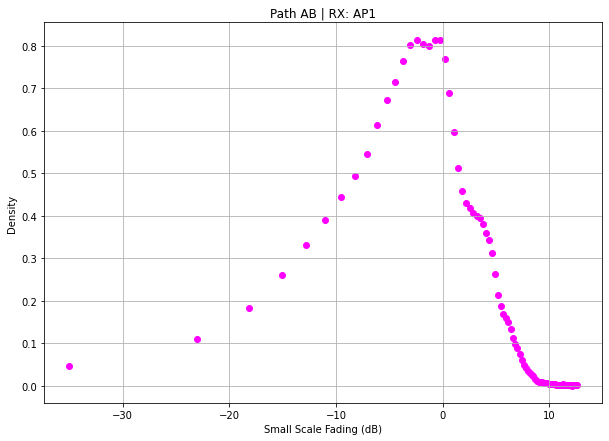

In [10]:
nAP = 'AP1'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [11]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP1

Best Fitness: 1035.1592735780573
Best Gen: 162
Kappa: 1.015251858479718
Mu: 1.1505780218019
Omega: 1.3824856080431136
Md: 0.44504620096272923
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP1

Best Fitness: 236.05848128634457
Best Gen: 199
Kappa: 0.5727735588377653
Mu: 1.0309926120161435
Omega: 1.333158513487072
Md: 0.4599265159432817


#### Plots

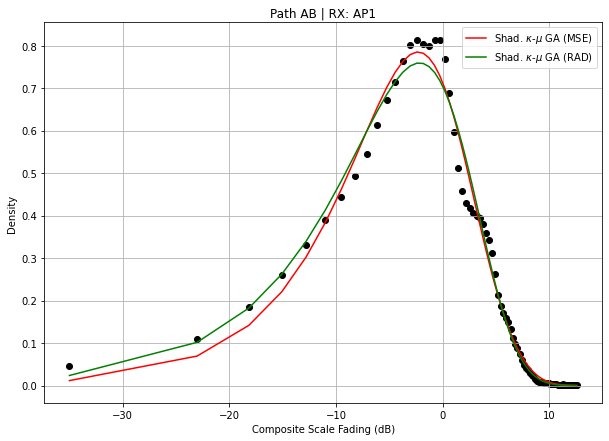

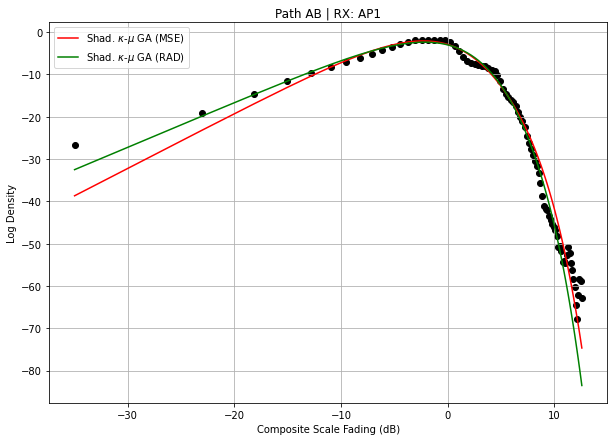

In [12]:
# mle_sku_t1_pathAB_ap9 = [6.50170000000000, 1, 1.02910000000000, 0.979880000000000]
# sku_t1_AB_ap9_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap9[0], mle_sku_t1_pathAB_ap9[1], mle_sku_t1_pathAB_ap9[2], mle_sku_t1_pathAB_ap9[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap9_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap9_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad )), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [13]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),31906.328561
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),31975.420251


### AP 2

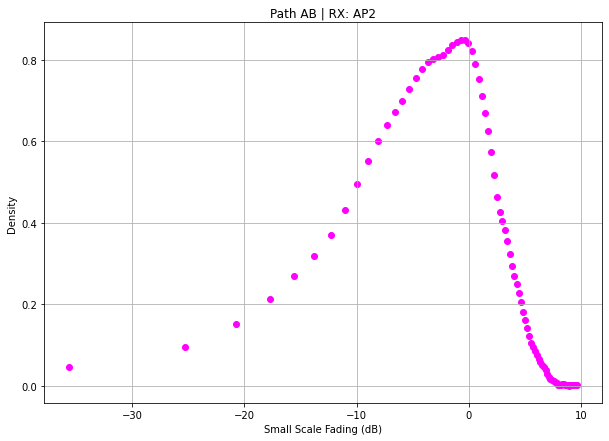

In [14]:
nAP = 'AP2'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [15]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP2

Best Fitness: 3290.189736847305
Best Gen: 195
Kappa: 2.4054456456964926
Mu: 0.9446470978104817
Omega: 1.047729812564086
Md: 1.6080047627403873
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP2

Best Fitness: 1128.6959833564088
Best Gen: 169
Kappa: 4.197169683891125
Mu: 0.9351758736672905
Omega: 1.0569566654462448
Md: 1.325504764368044


#### Plots

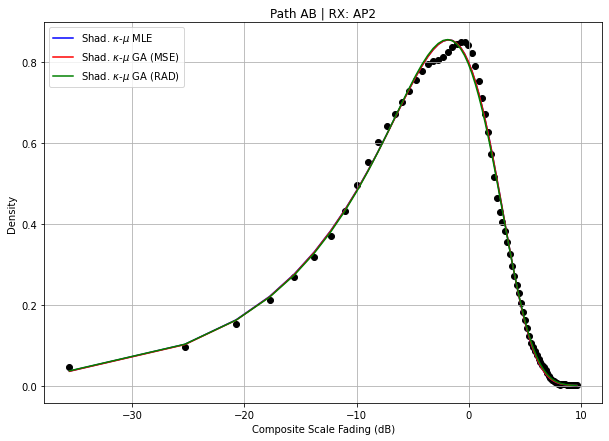

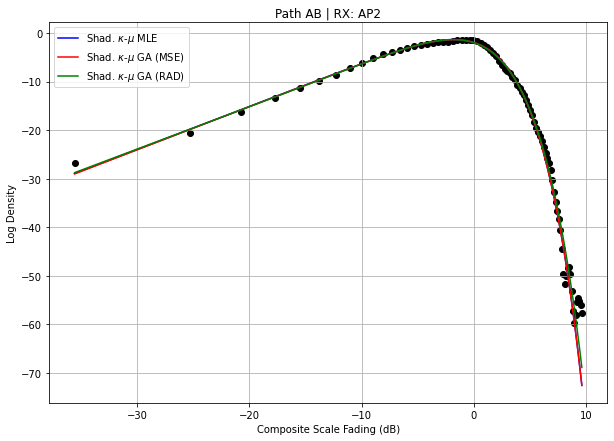

In [16]:
mle_sku_t1_pathAB_ap2 = [2.44470000000000, 0.942930000000000, 1.04700000000000, 1.59680000000000]
sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [17]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),20801.425636
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),20805.957699
2,Maximum Likelihood Estimator - Shad. KappaMu,20806.212984


### AP 3

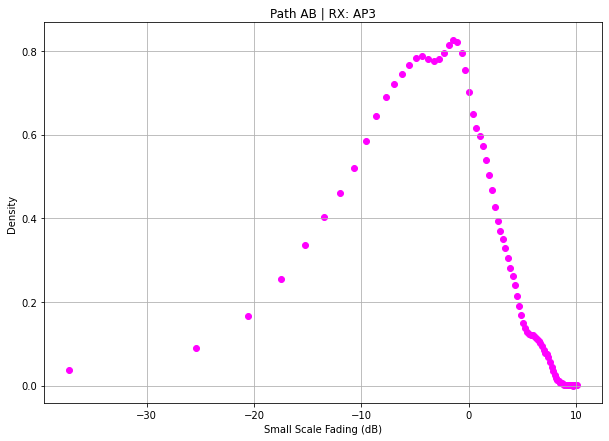

In [18]:
nAP = 'AP3'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [19]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP3

Best Fitness: 3056.4178977469955
Best Gen: 187
Kappa: 0.5193013813363959
Mu: 1.0099918831904988
Omega: 1.1797387235398222
Md: 0.22470484260669696
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP3

Best Fitness: 246.67875604843192
Best Gen: 147
Kappa: 1.8177645175067934
Mu: 1.0191161765162347
Omega: 1.1272089101941956
Md: 0.707240260601908


#### Plots

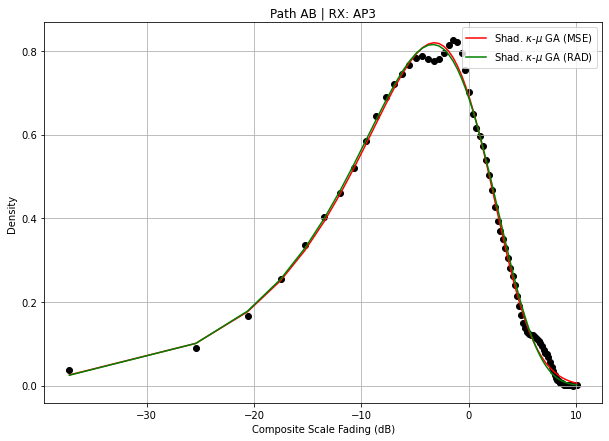

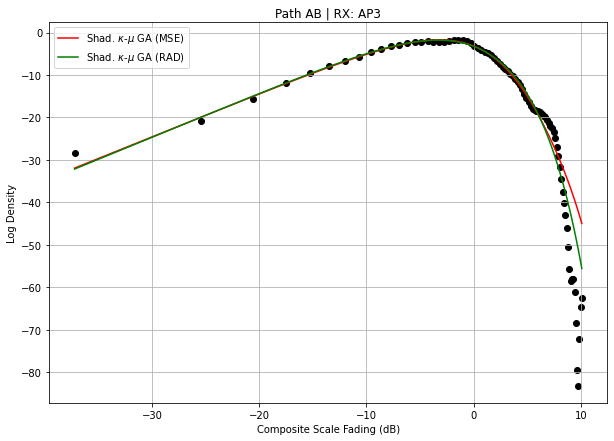

In [20]:
# mle_sku_t1_pathAB_ap2 = [2.44470000000000, 0.942930000000000, 1.04700000000000, 1.59680000000000]
# sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [21]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),28781.130650
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),28920.787869


### AP 4

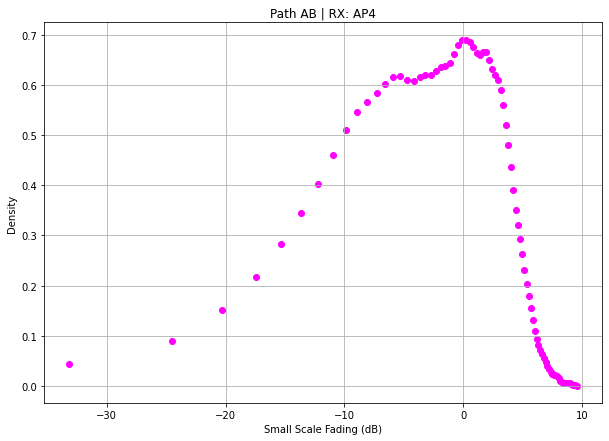

In [22]:
nAP = 'AP4'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [23]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP4

Best Fitness: 569.9605689112889
Best Gen: 190
Kappa: 1.2797374398454051
Mu: 0.7935510379089397
Omega: 1.3344197946654501
Md: 13.55141945129005
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP4

Best Fitness: 196.36369736068144
Best Gen: 108
Kappa: 1.1915015784544989
Mu: 0.8471771140521333
Omega: 1.2742370479752303
Md: 26.0133021533864


#### Plots

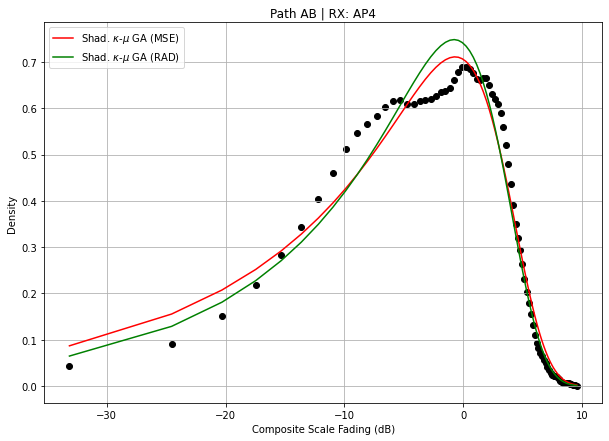

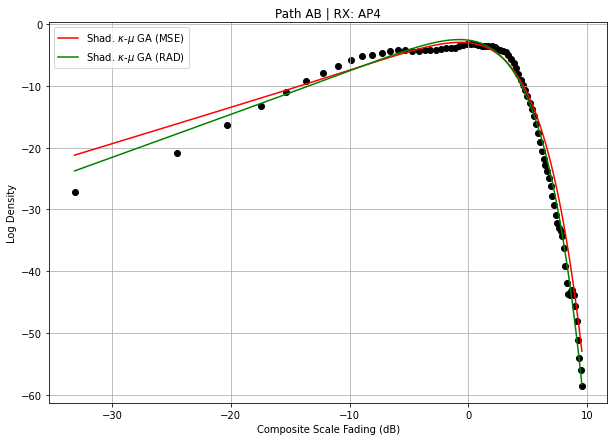

In [24]:
# mle_sku_t1_pathAB_ap2 = [2.44470000000000, 0.942930000000000, 1.04700000000000, 1.59680000000000]
# sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [25]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),27609.072612
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),27729.471082


### AP 5

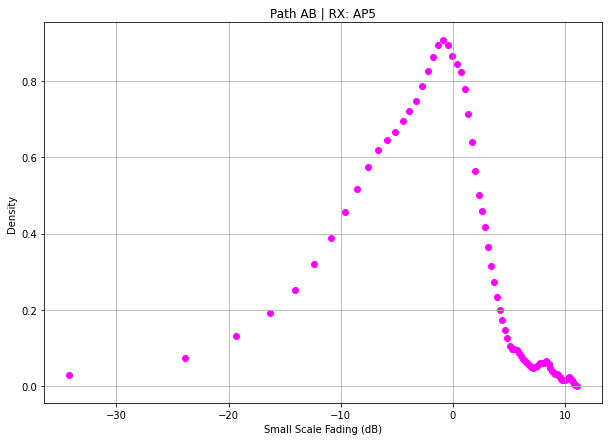

In [26]:
nAP = 'AP5'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [27]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP5

Best Fitness: 638.1837346633408
Best Gen: 194
Kappa: 1.5175064952600177
Mu: 0.9139338025432883
Omega: 1.0293460788704576
Md: 10.143228033925816
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP5

Best Fitness: 121.77789264271266
Best Gen: 187
Kappa: 0.7313611895956971
Mu: 1.2423427632166857
Omega: 1.5788661745603667
Md: 0.06305170955631251


#### Plots

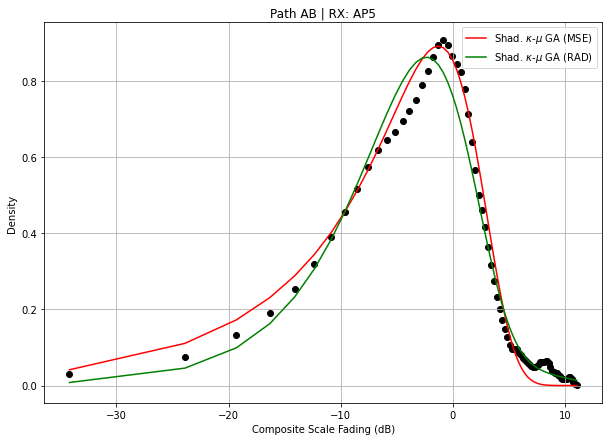

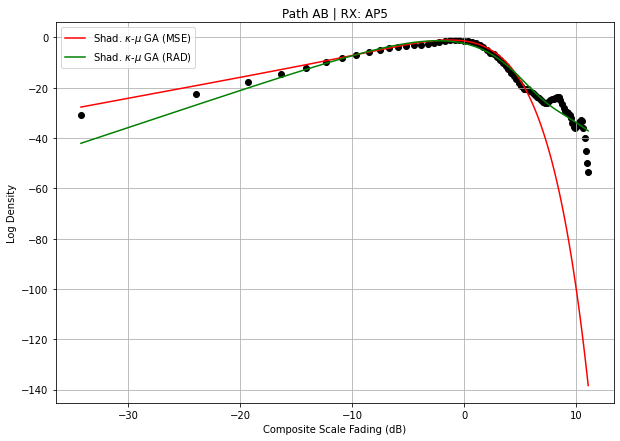

In [28]:
# mle_sku_t1_pathAB_ap2 = [2.44470000000000, 0.942930000000000, 1.04700000000000, 1.59680000000000]
# sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [29]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),27098.443384
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),32765.828361


### AP 6

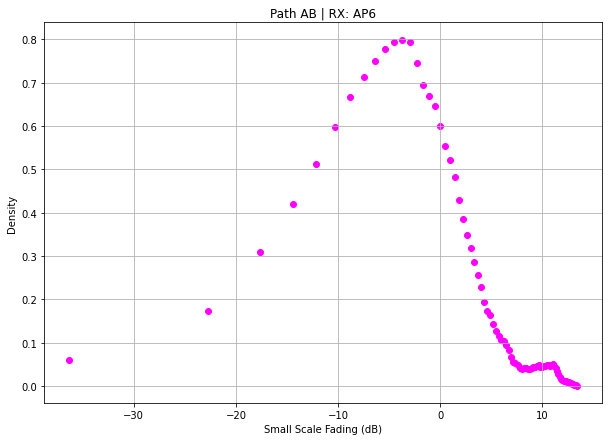

In [30]:
nAP = 'AP6'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [31]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP6

Best Fitness: 8058.618408933564
Best Gen: 199
Kappa: 1.6175436204480682
Mu: 0.931841785127227
Omega: 1.9174349650348659
Md: 0.09387999084756664
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP6

Best Fitness: 194.12196326918829
Best Gen: 181
Kappa: 1.6141806966666492
Mu: 0.9349177411774324
Omega: 1.877557349365357
Md: 0.10187947551011967


#### Plots

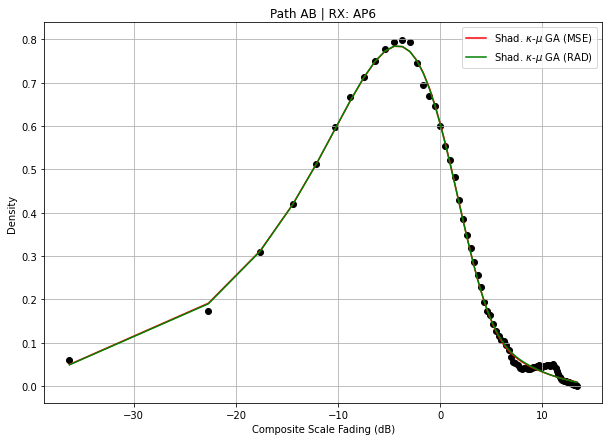

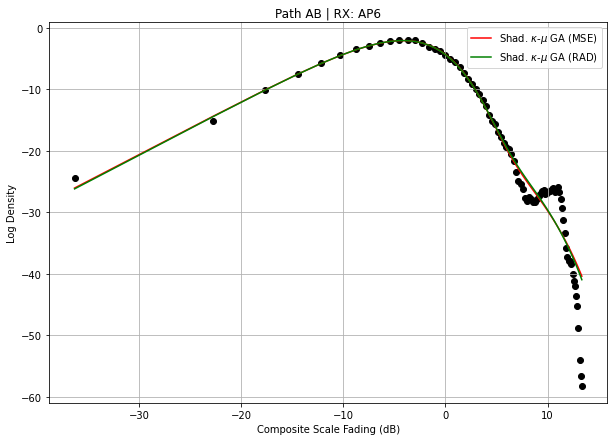

In [32]:
# mle_sku_t1_pathAB_ap2 = [2.44470000000000, 0.942930000000000, 1.04700000000000, 1.59680000000000]
# sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [33]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),30928.097212
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),30972.090293


### AP 7

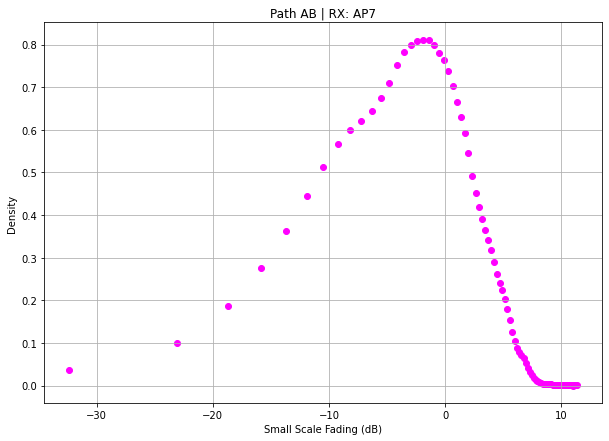

In [34]:
nAP = 'AP7'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [35]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP7

Best Fitness: 4673.580115863806
Best Gen: 199
Kappa: 1.5592343758718397
Mu: 0.978789056387412
Omega: 1.1402995155791025
Md: 1.1309523977372486
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP7

Best Fitness: 860.6468845160596
Best Gen: 124
Kappa: 0.39821307346697876
Mu: 0.9937281995879096
Omega: 1.1329749611804636
Md: 3.540568946184082


#### Plots

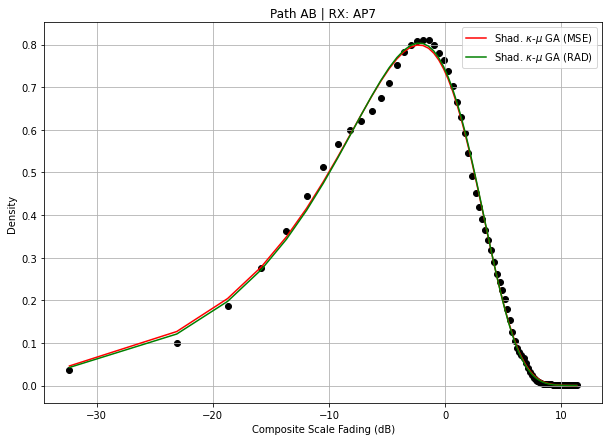

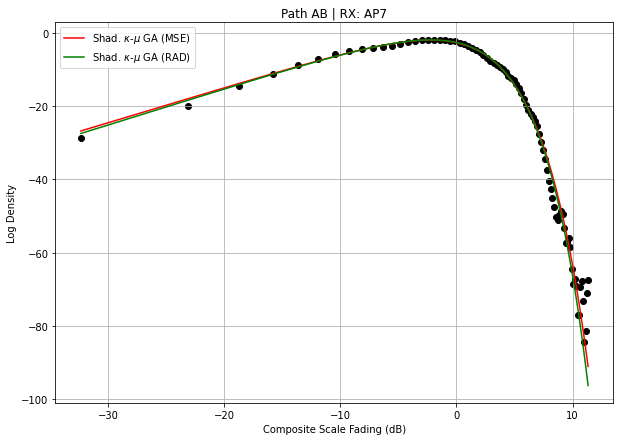

In [36]:
# mle_sku_t1_pathAB_ap2 = [2.44470000000000, 0.942930000000000, 1.04700000000000, 1.59680000000000]
# sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [37]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),24146.920151
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),24157.633079


### AP 8

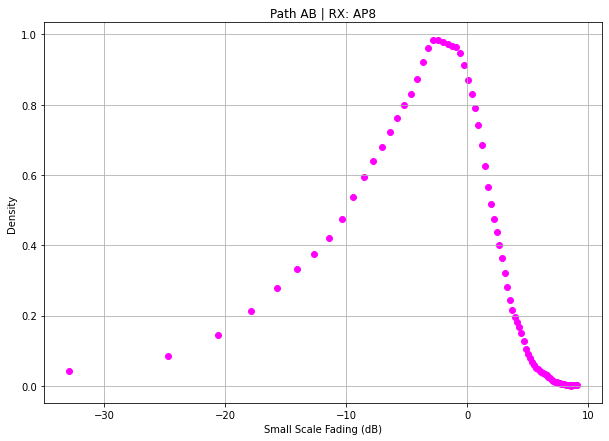

In [38]:
nAP = 'AP8'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [39]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP8

Best Fitness: 3693.345165140687
Best Gen: 144
Kappa: 1.4137037697134445
Mu: 0.9488906995609934
Omega: 0.8733138160492331
Md: 13.343464641517382
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP8

Best Fitness: 679.4649227493969
Best Gen: 187
Kappa: 8.661169404301331
Mu: 0.9454089942287183
Omega: 0.9139439193461446
Md: 1.3503594187936985


#### Plots

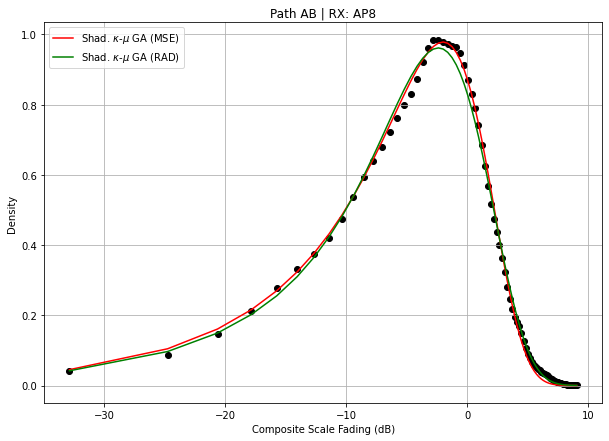

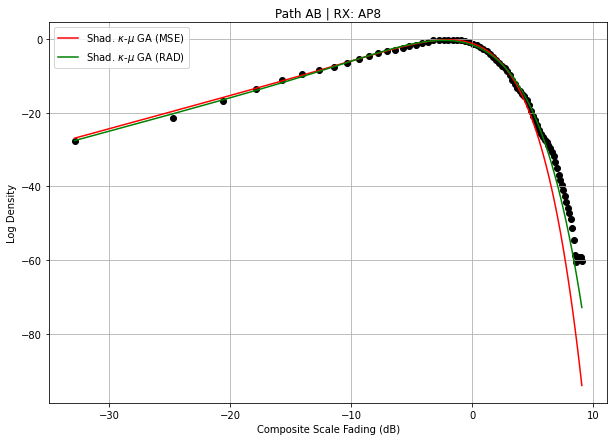

In [40]:
# mle_sku_t1_pathAB_ap2 = [2.44470000000000, 0.942930000000000, 1.04700000000000, 1.59680000000000]
# sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [41]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),18133.473609
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),18339.741750


### AP 9

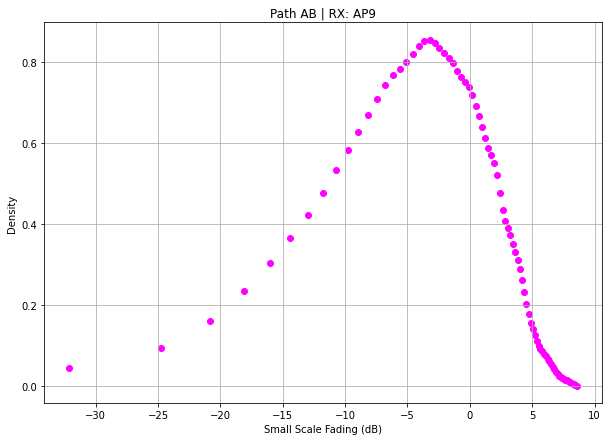

In [42]:
nAP = 'AP9'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [43]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP9

Best Fitness: 10204.141600051935
Best Gen: 195
Kappa: 9.678575553253701
Mu: 1.0561001302303203
Omega: 1.0351106075359124
Md: 0.9670033251484977
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP9

Best Fitness: 2722.0401181063344
Best Gen: 198
Kappa: 21.032351850625723
Mu: 1.0525425474697758
Omega: 1.0216581587292155
Md: 0.9925902629378893


#### Plots

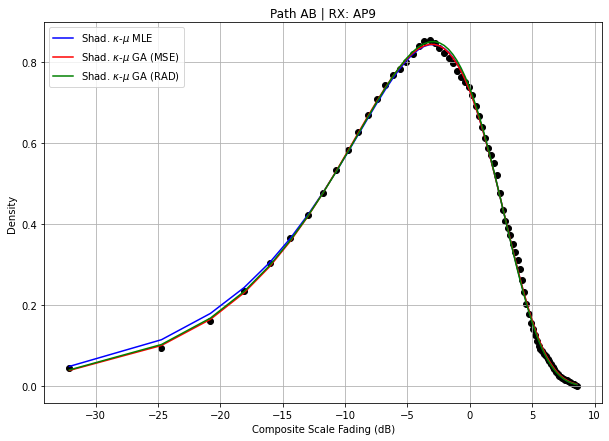

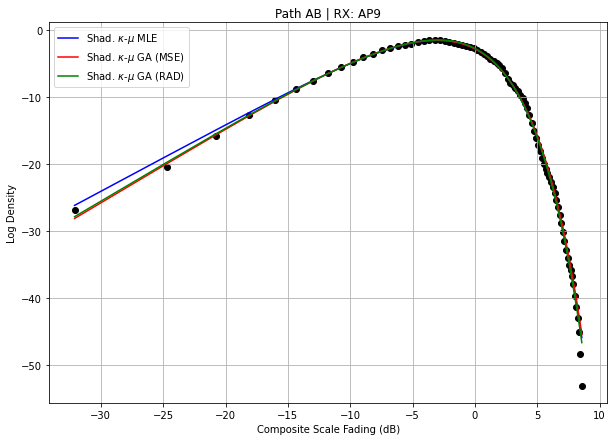

In [44]:
mle_sku_t1_pathAB_ap9 = [6.50170000000000, 1, 1.02910000000000, 0.979880000000000]
sku_t1_AB_ap9_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap9[0], mle_sku_t1_pathAB_ap9[1], mle_sku_t1_pathAB_ap9[2], mle_sku_t1_pathAB_ap9[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t1_AB_ap9_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap9_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [45]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap9[0], mle_sku_t1_pathAB_ap9[1], mle_sku_t1_pathAB_ap9[2], mle_sku_t1_pathAB_ap9[3])))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['Maximum Likelihood Estimator - Shad. KappaMu', 'Genetic Algorithm - Shad. KappaMu (Fitness = MSE)',\
                   'Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),21656.397193
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),21666.425179
2,Maximum Likelihood Estimator - Shad. KappaMu,21678.089124


## Shadowed $\kappa$-$\mu$ (type 1) - Path: BA

In [46]:
path = 'BA'

### AP 1

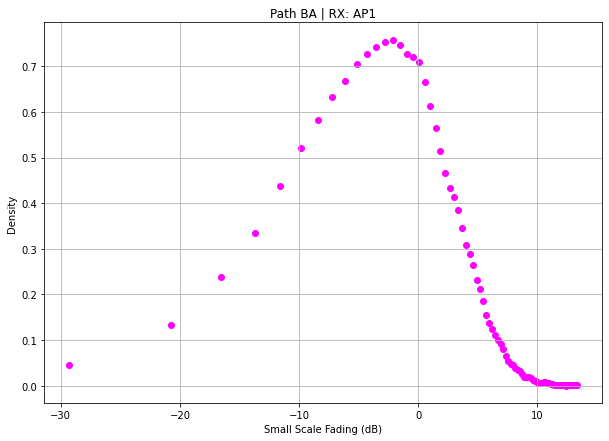

In [47]:
nAP = 'AP1'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [48]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)


Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP1

Best Fitness: 14111.599091394512
Best Gen: 123
Kappa: 0.7293899900514651
Mu: 1.0131923943740861
Omega: 1.343012399187694
Md: 0.3458602317421175
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP1

Best Fitness: 1465.9865430635114
Best Gen: 188
Kappa: 0.5371880102694206
Mu: 1.0169560802447157
Omega: 1.357114643433964
Md: 0.23002851770414615


#### Plots

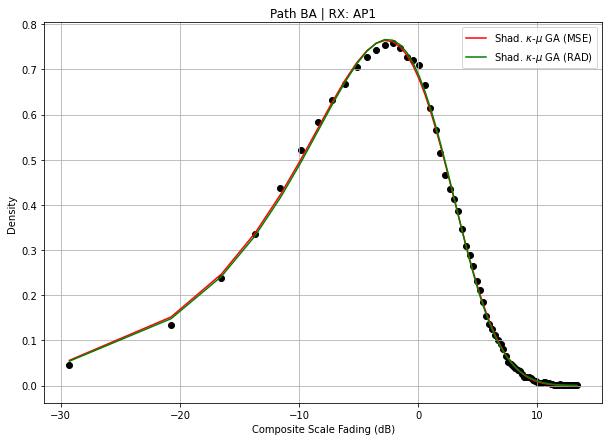

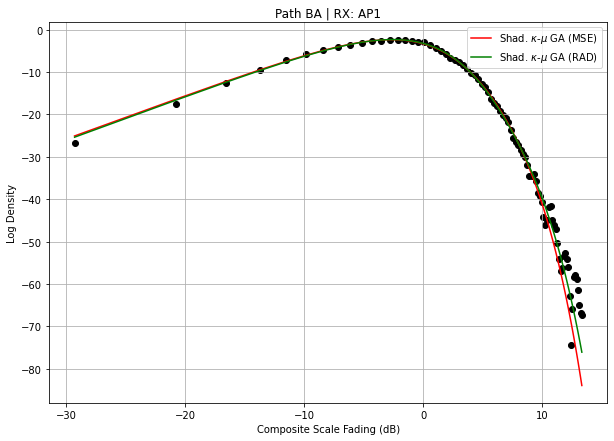

In [49]:
# mle_sku_t1_pathAB_ap9 = [6.50170000000000, 1, 1.02910000000000, 0.979880000000000]
# sku_t1_AB_ap9_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap9[0], mle_sku_t1_pathAB_ap9[1], mle_sku_t1_pathAB_ap9[2], mle_sku_t1_pathAB_ap9[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap9_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap9_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [50]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),32036.214967
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),32053.560667


### AP 2

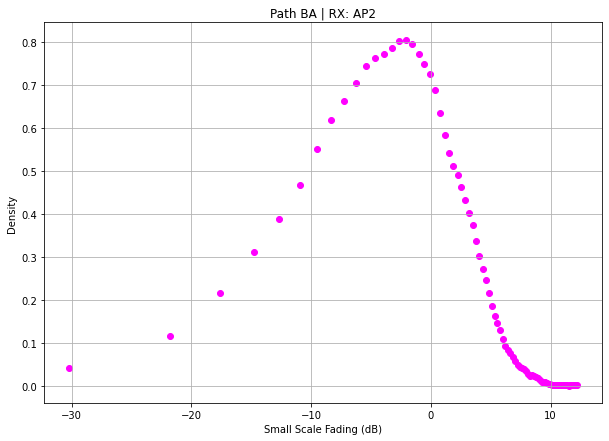

In [51]:
nAP = 'AP2'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [52]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP2

Best Fitness: 12539.16351049279
Best Gen: 196
Kappa: 0.6725553997393785
Mu: 1.033074493895481
Omega: 1.2069677456155967
Md: 0.42336727882710445
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP2

Best Fitness: 1455.1824149279387
Best Gen: 196
Kappa: 0.5740305674057975
Mu: 1.042912856479563
Omega: 1.2083819715204271
Md: 0.35492627276377076


#### Plots

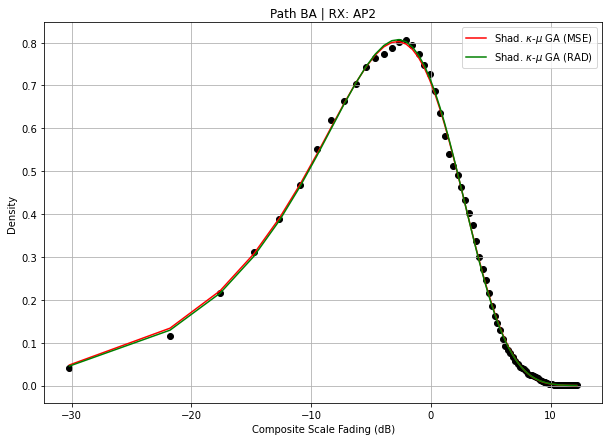

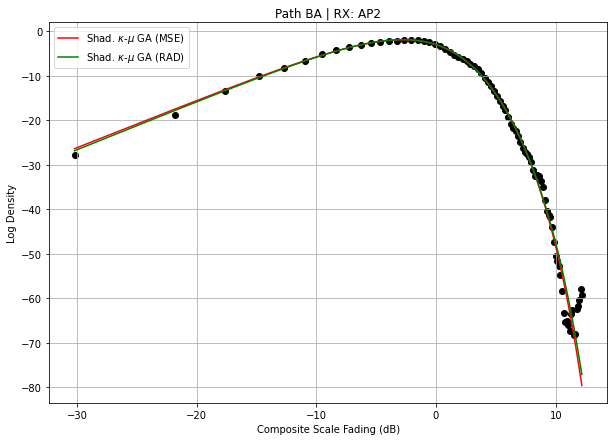

In [53]:
# mle_sku_t1_pathAB_ap2 = [2.44470000000000, 0.942930000000000, 1.04700000000000, 1.59680000000000]
# sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [54]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),28431.944674
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),28439.120849


### AP 3

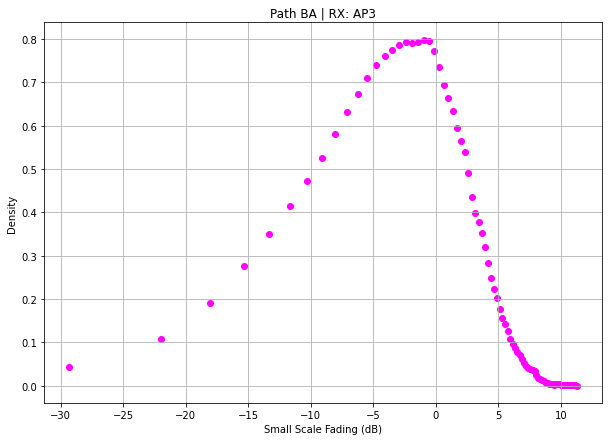

In [55]:
nAP = 'AP3'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [56]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP3

Best Fitness: 13480.437195298382
Best Gen: 10
Kappa: 0.9791927930135187
Mu: 1.028031986301
Omega: 1.1571392106116967
Md: 1.0575856500886258
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP3

Best Fitness: 1833.8440012656808
Best Gen: 189
Kappa: 0.29475193490645824
Mu: 1.0576652781565905
Omega: 1.1870957029159066
Md: 0.31959629892084346


#### Plots

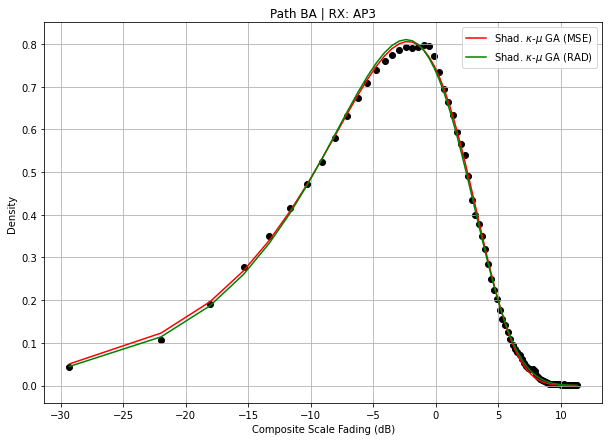

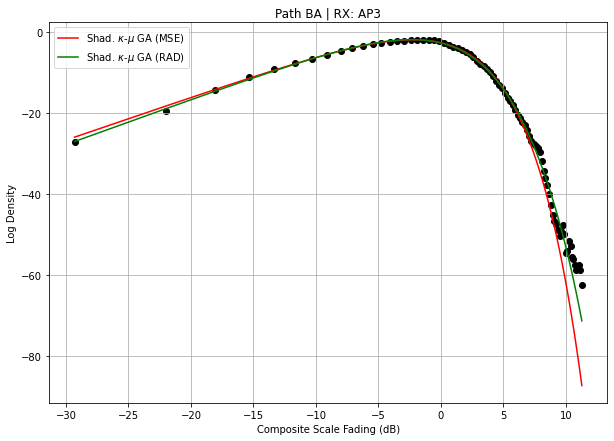

In [58]:
# mle_sku_t1_pathAB_ap2 = [2.44470000000000, 0.942930000000000, 1.04700000000000, 1.59680000000000]
# sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [59]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),26121.799053
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),26187.207391


### AP 4

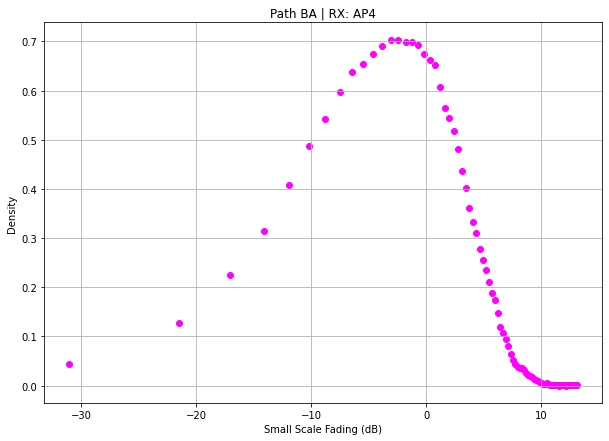

In [60]:
nAP = 'AP4'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [61]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP4

Best Fitness: 26561.857295323854
Best Gen: 91
Kappa: 17.693641654649667
Mu: 1.1073259944924718
Omega: 1.3705180114609754
Md: 0.8827279672680299
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP4

Best Fitness: 1251.0853708229356
Best Gen: 199
Kappa: 0.29351035852656965
Mu: 0.963183293481301
Omega: 1.3853990924650748
Md: 0.25702949326669566


#### Plots

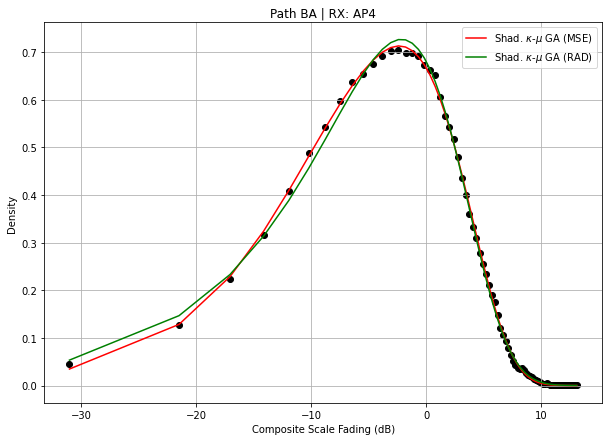

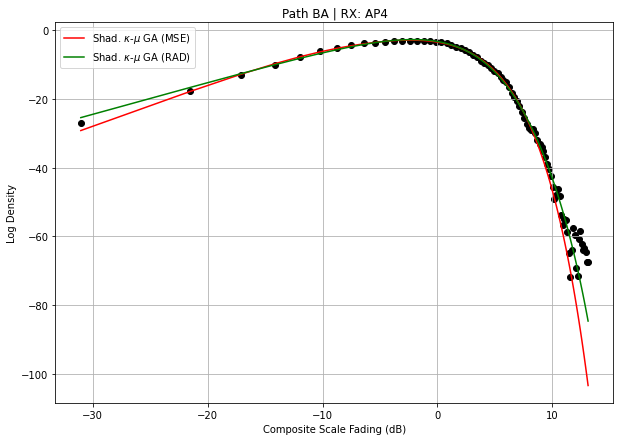

In [62]:
# mle_sku_t1_pathAB_ap2 = [2.44470000000000, 0.942930000000000, 1.04700000000000, 1.59680000000000]
# sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [64]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),31814.299660
1,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),31817.265201


### AP 5

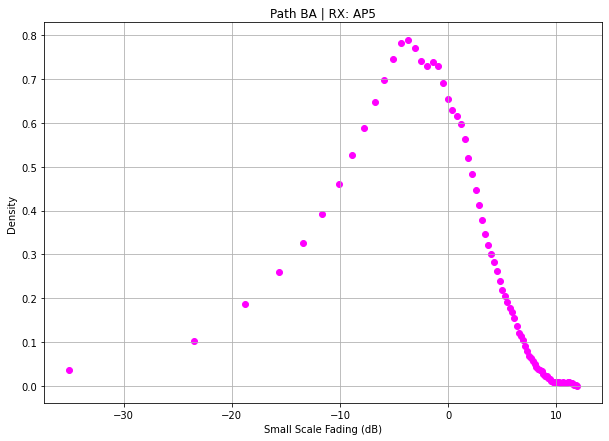

In [65]:
nAP = 'AP5'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [66]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP5

Best Fitness: 9354.524392456655
Best Gen: 165
Kappa: 1.3523839505106514
Mu: 1.0771111407267608
Omega: 1.4146573878773834
Md: 0.4240723830152181
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP5

Best Fitness: 920.4843285153542
Best Gen: 172
Kappa: 0.9073041918116771
Mu: 1.0294026806972494
Omega: 1.4155145623292011
Md: 0.3251550770500827


#### Plots

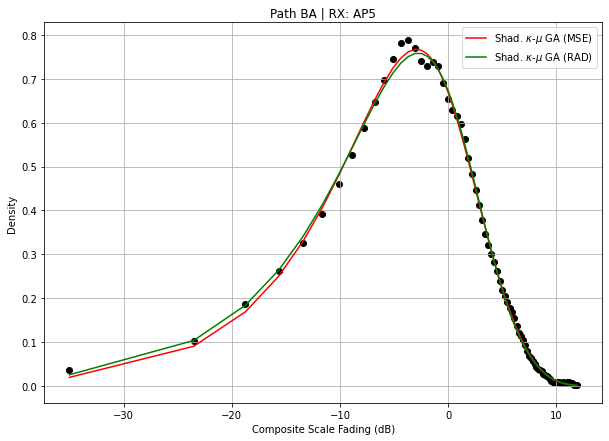

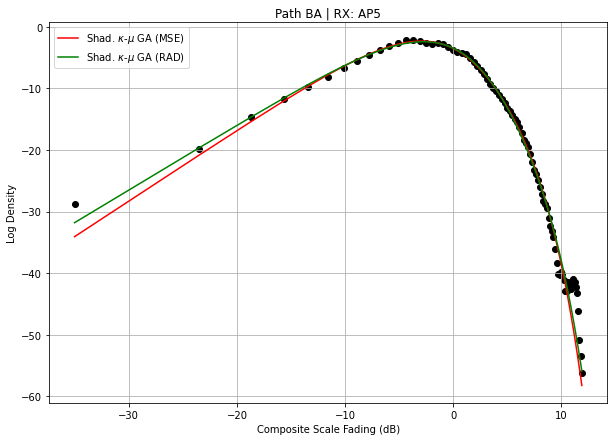

In [67]:
# mle_sku_t1_pathAB_ap2 = [2.44470000000000, 0.942930000000000, 1.04700000000000, 1.59680000000000]
# sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [68]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),31318.071705
1,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),31326.865505


### AP 6

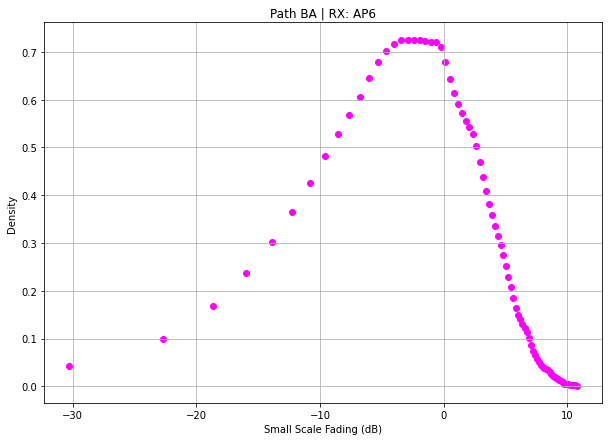

In [69]:
nAP = 'AP6'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [70]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP6

Best Fitness: 21985.72534040305
Best Gen: 197
Kappa: 2.838711784694585
Mu: 1.0360173836994513
Omega: 1.3769571175580118
Md: 0.8158947995081905
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP6

Best Fitness: 4407.956310218597
Best Gen: 99
Kappa: 3.2079816774354124
Mu: 1.0477291036647962
Omega: 1.3776758562613618
Md: 0.8195630455992645


#### Plots

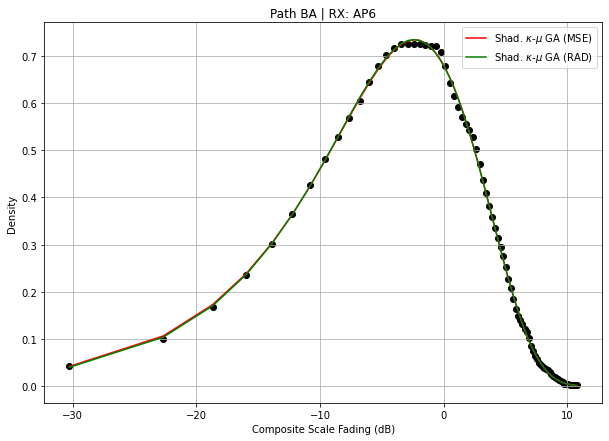

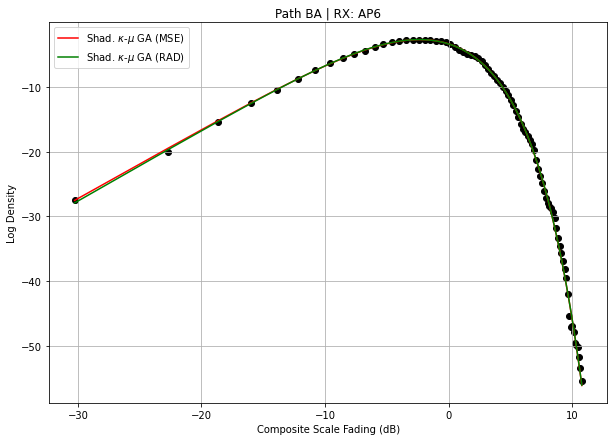

In [71]:
# mle_sku_t1_pathAB_ap2 = [2.44470000000000, 0.942930000000000, 1.04700000000000, 1.59680000000000]
# sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [72]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),30858.396814
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),30861.339949


### AP 7

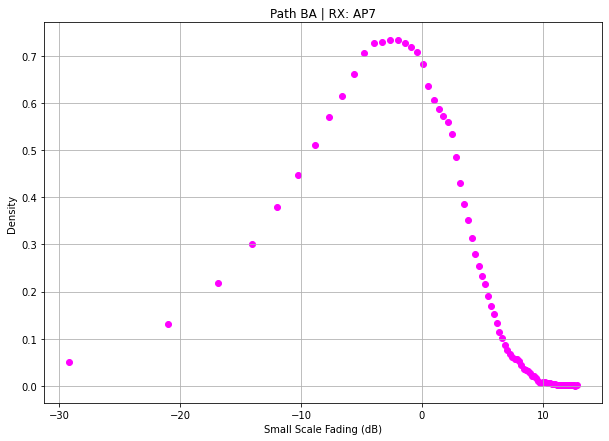

In [73]:
nAP = 'AP7'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [74]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP7

Best Fitness: 10756.458472440914
Best Gen: 199
Kappa: 1.3616652053329594
Mu: 1.0177627278281425
Omega: 1.3530824764878333
Md: 0.7126410257775476
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP7

Best Fitness: 1898.3557859472276
Best Gen: 197
Kappa: 0.42417418533717083
Mu: 1.0139946652578842
Omega: 1.3961059722317095
Md: 0.2376482788992998


#### Plots

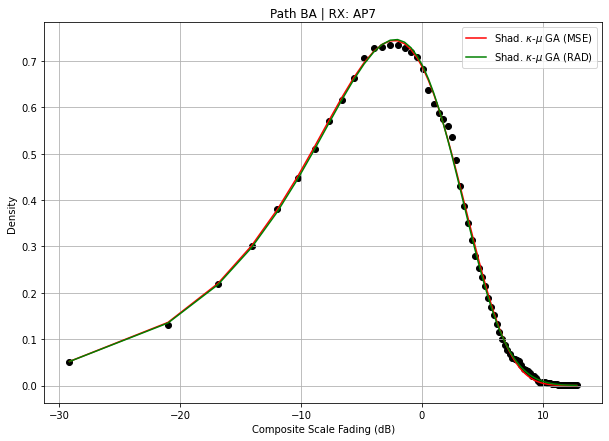

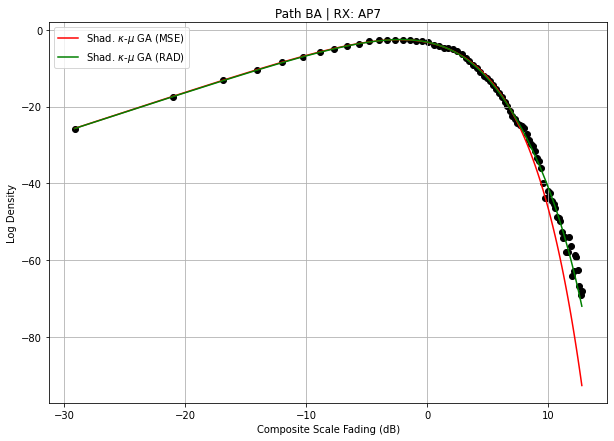

In [75]:
# mle_sku_t1_pathAB_ap2 = [2.44470000000000, 0.942930000000000, 1.04700000000000, 1.59680000000000]
# sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [76]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),32303.096799
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),32384.370785


### AP 8

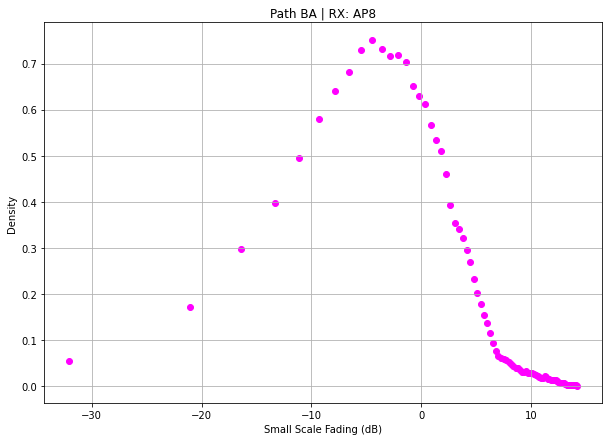

In [77]:
nAP = 'AP8'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [78]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP8

Best Fitness: 7014.249790554179
Best Gen: 198
Kappa: 0.9171742474631871
Mu: 0.9387652689288102
Omega: 1.4716769203695168
Md: 0.22064062811982718
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP8

Best Fitness: 673.2958551113684
Best Gen: 115
Kappa: 0.7555092948201496
Mu: 0.9380612275079669
Omega: 1.637109836691413
Md: 0.09355256810798854


#### Plots

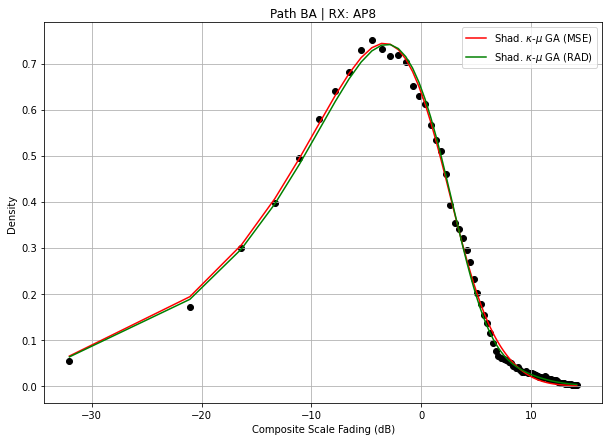

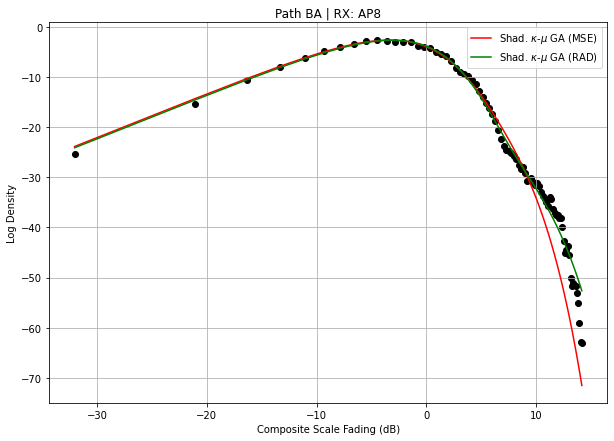

In [79]:
# mle_sku_t1_pathAB_ap2 = [2.44470000000000, 0.942930000000000, 1.04700000000000, 1.59680000000000]
# sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [80]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),34789.817273
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),34987.581710


### AP 9

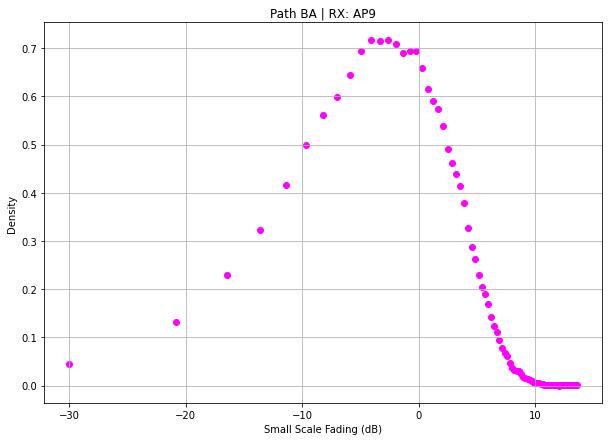

In [81]:
nAP = 'AP9'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [82]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP9

Best Fitness: 26204.226442381005
Best Gen: 118
Kappa: 8.888584773370265
Mu: 1.0834112909496654
Omega: 1.3736862219836172
Md: 0.8676074424971315
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP9

Best Fitness: 1668.8355125374803
Best Gen: 104
Kappa: 4.678299115884896
Mu: 1.0523744199277196
Omega: 1.3833808226624005
Md: 0.8198717934938283


#### Plots

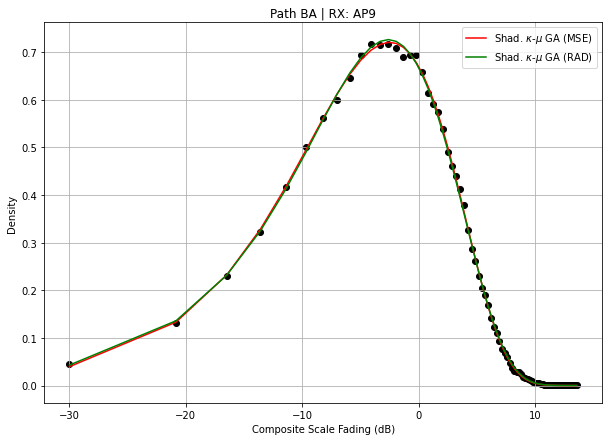

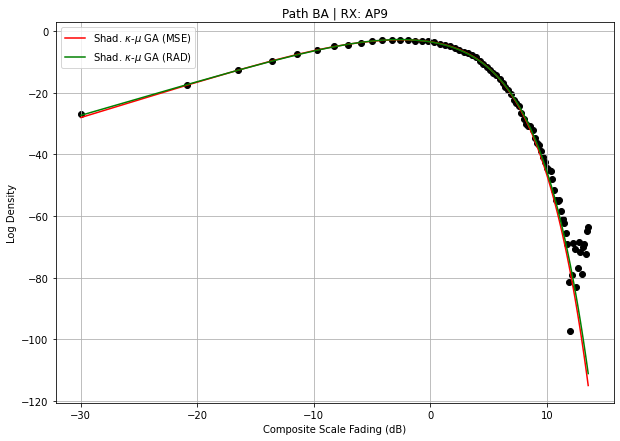

In [83]:
# mle_sku_t1_pathAB_ap9 = [6.50170000000000, 1, 1.02910000000000, 0.979880000000000]
# sku_t1_AB_ap9_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap9[0], mle_sku_t1_pathAB_ap9[1], mle_sku_t1_pathAB_ap9[2], mle_sku_t1_pathAB_ap9[3])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
# plt.plot(20*np.log10(Xdata), sku_t1_AB_ap9_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
# plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t1_AB_ap9_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_mse, mu_mse, omega_mse, md_mse)), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, kappa_rad, mu_rad, omega_rad, md_rad)), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [84]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# # AIC MLE - SHADOWED KAPPA MU
# sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku_t1_pathAB_ap9[0], mle_sku_t1_pathAB_ap9[1], mle_sku_t1_pathAB_ap9[2], mle_sku_t1_pathAB_ap9[3])))
# AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_mse, mu_mse, omega_mse, md_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF(data, kappa_rad, mu_rad, omega_rad, md_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


# rads = {'Methods':['Maximum Likelihood Estimator - Shadowed KappaMu', 'Genetic Algorithm - KappaMu (Fitness = MSE)',\
#                    'Genetic Algorithm - KappaMu (Fitness = RAD)'],
#     'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
rads = {'Methods':['Genetic Algorithm - Shad. KappaMu (Fitness = MSE)','Genetic Algorithm - Shad. KappaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,Genetic Algorithm - Shad. KappaMu (Fitness = RAD),31323.711670
1,Genetic Algorithm - Shad. KappaMu (Fitness = MSE),31324.147128
